### Building Blocks of LangGraph

To build applications with LangGraph, you need to understand its core components. Let’s explore the fundamental building blocks that make up a LangGraph application.

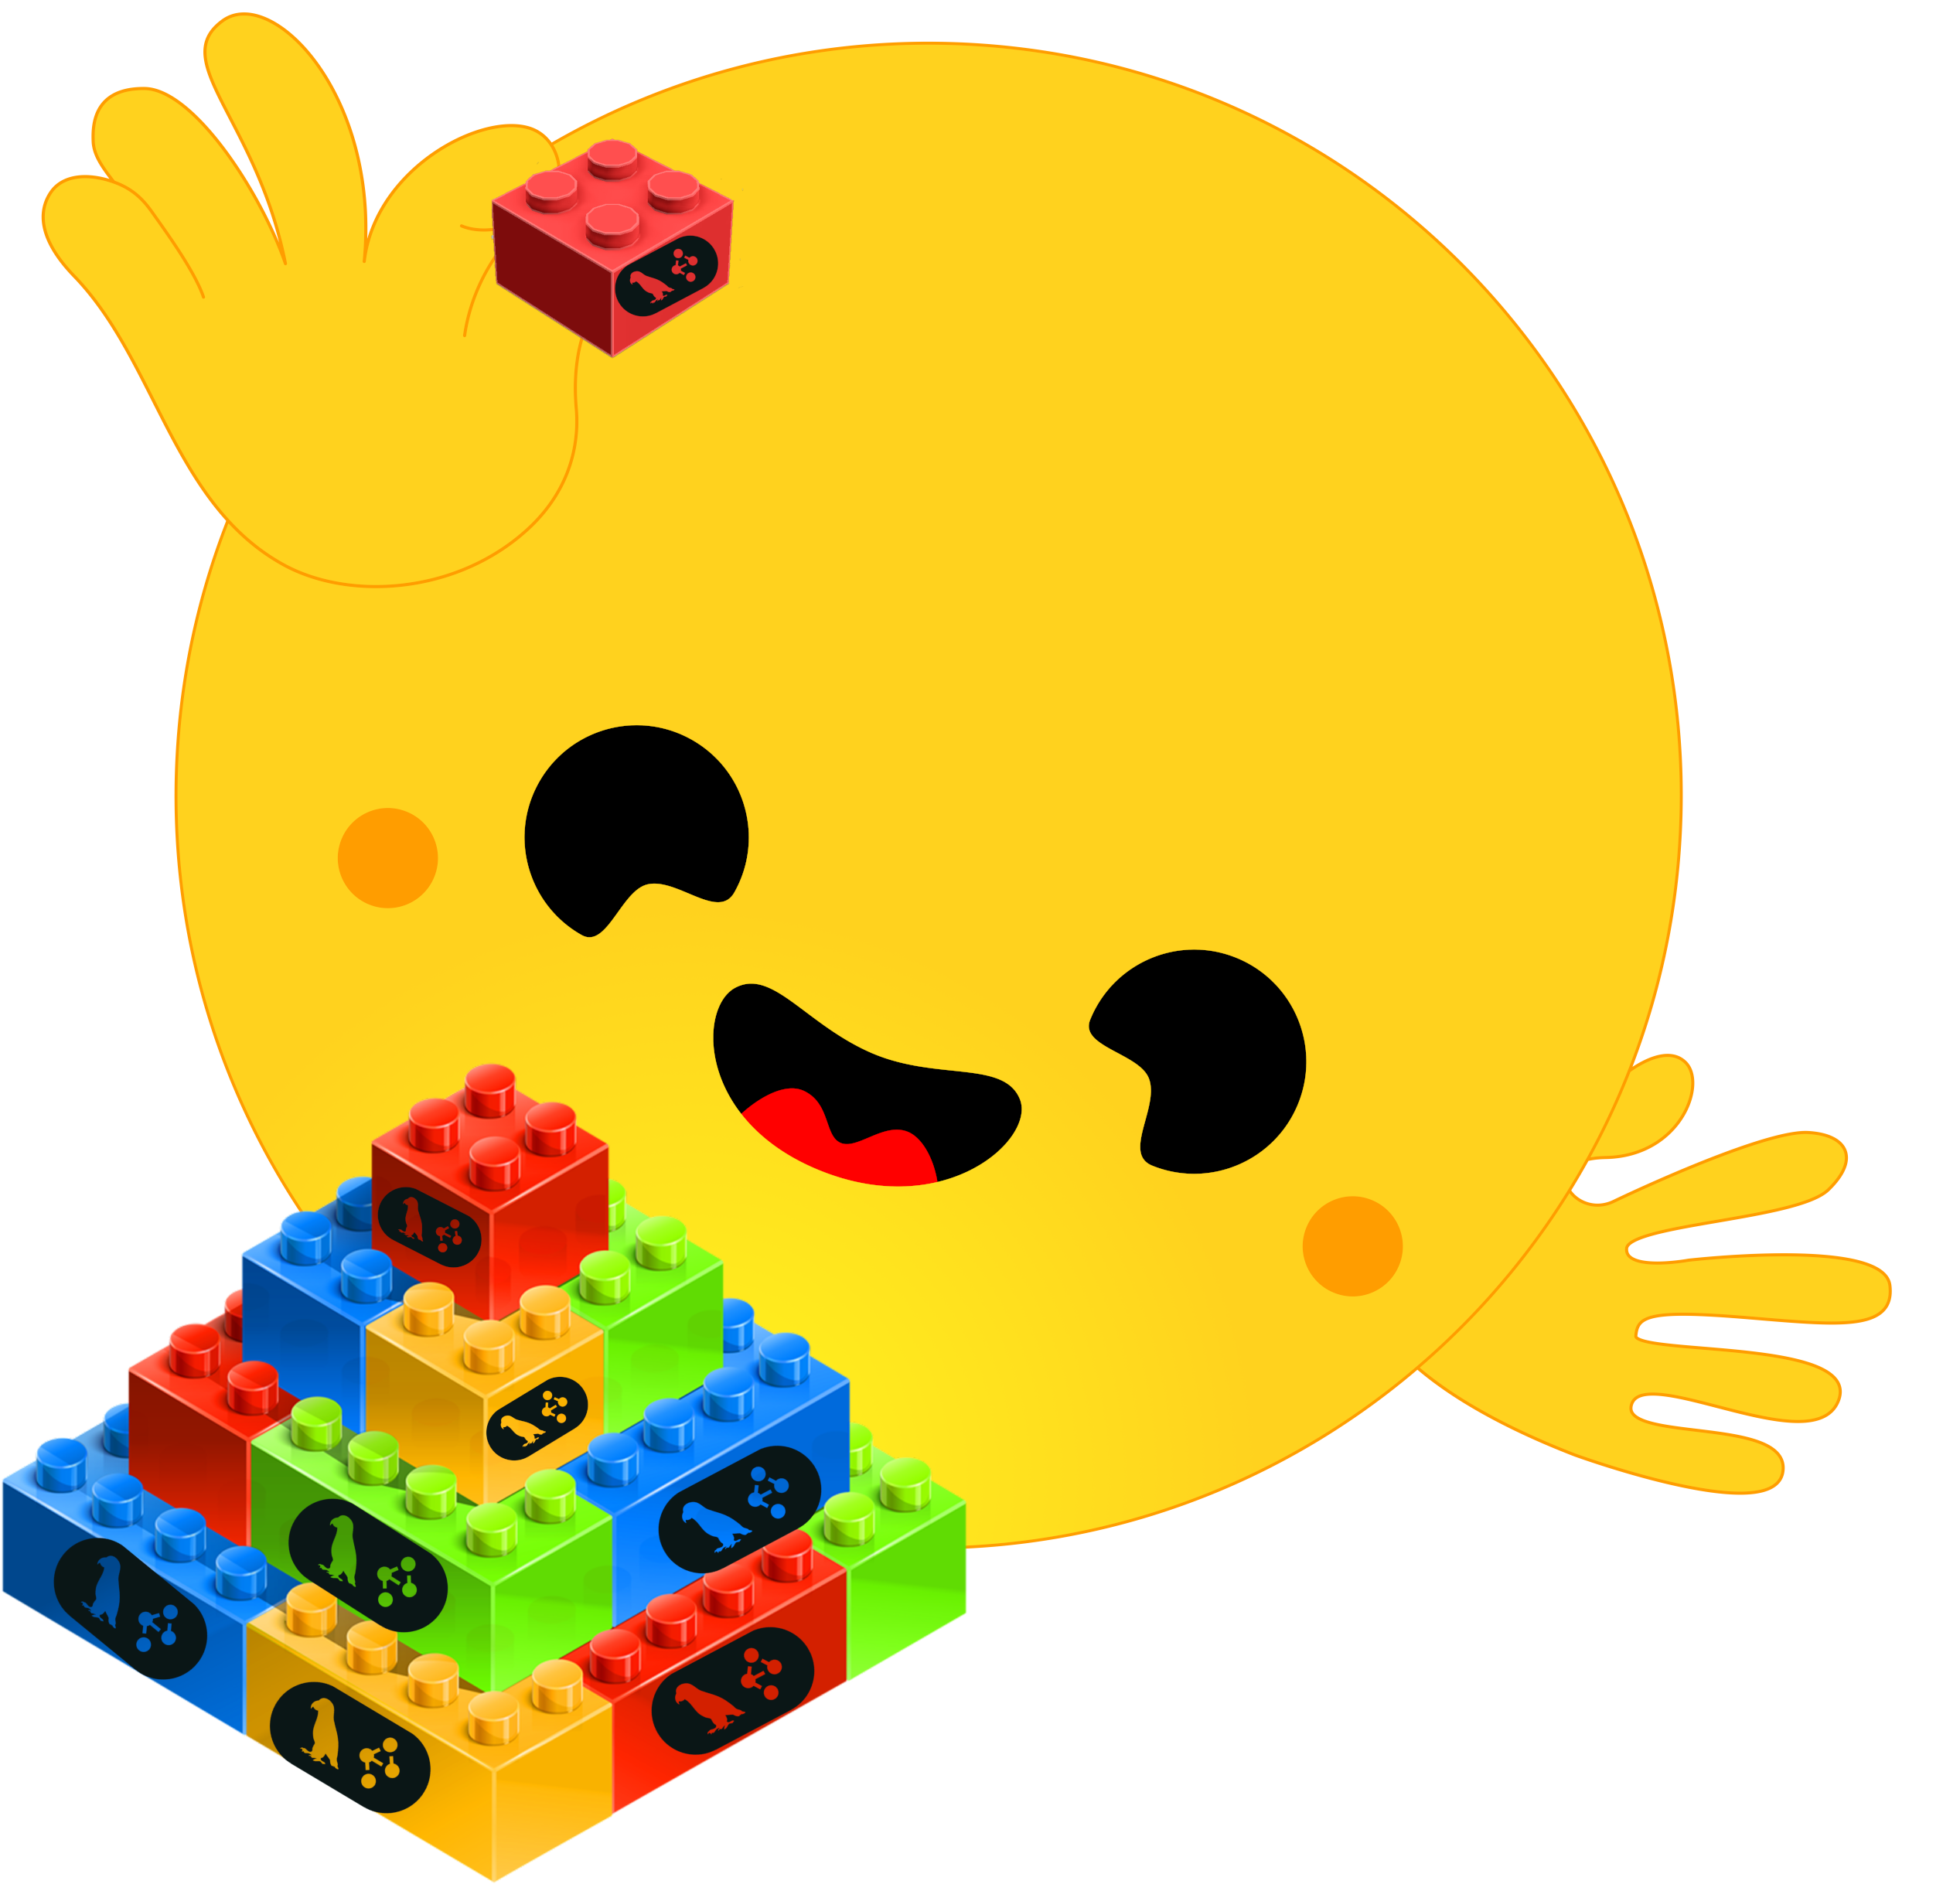

An application in LangGraph starts from an entrypoint, and depending on the execution, the flow may go to one function or another until it reaches the END.

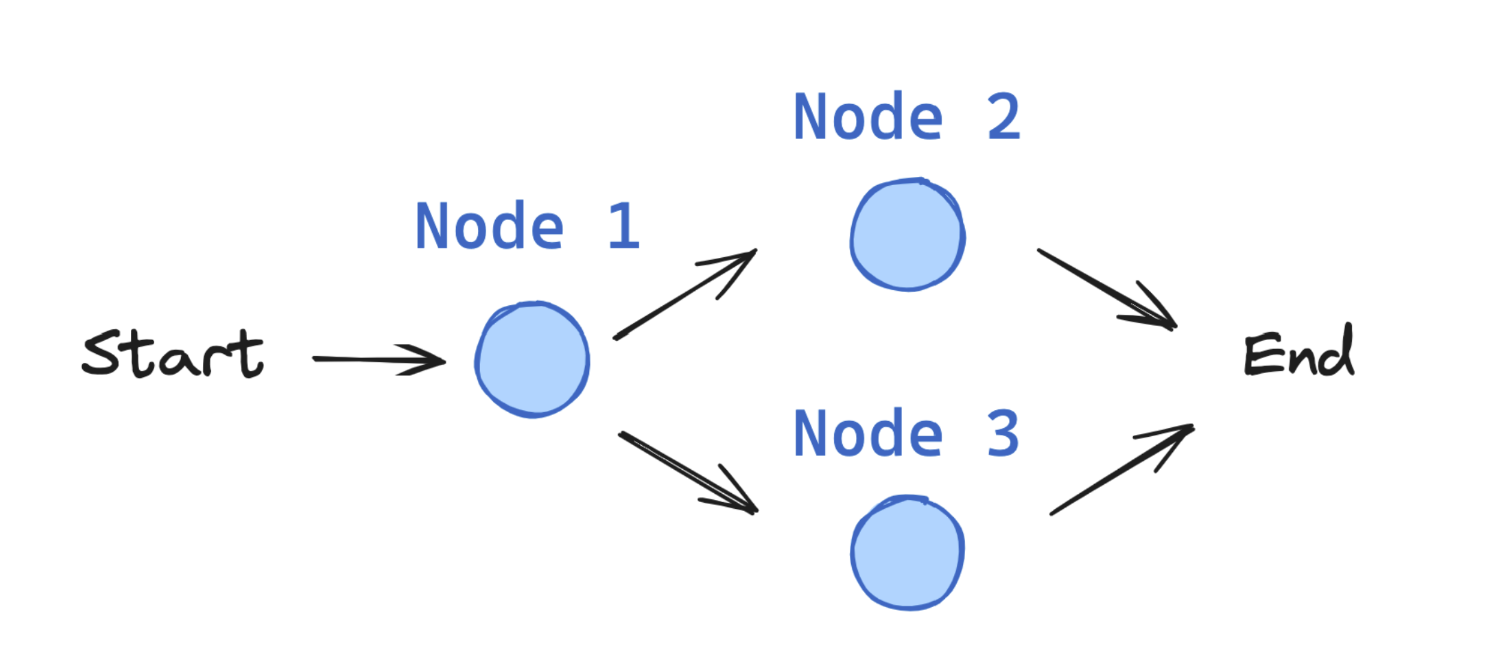

### 1. State

`State` is the central concept in LangGraph. It represents all the information that flows through your application.

In [1]:
from typing_extensions import TypedDict

class State(TypedDict):
    graph_state: str

The state is User defined, hence the fields should carefully be crafted to contain all data needed for decision-making process!

"<i>💡 Tip: Think carefully about what information your application needs to track between steps.<i>"

### 2. Nodes
`Nodes` are python functions. Each node:
* Takes the state as input 
* Performs some operation
* Return updates to the state

In [10]:
def node_1(state):
    print("---Node 1---")
    return {"graph_state": state['graph_state'] + " I am"}

def node_2(state):
    print("---Node 2---")
    return {"graph_state": state["graph_state"] + " happy! :)"}

def node_3(state):
    print("---Node 3---")
    return {"graph_state": state['graph_state'] + ' sad! :('}

For example, Nodes can contain:

* LLM calls: Generate text or make decisions
* Tool calls: Interact with external systems:
* Conditional logic: Determine next steps
* Human intervention: Get input from users

<i>"💡 Info: Some nodes necessary for the whole workflow like START and END exist from LangGraph directly."</i>

### 3. Edges

`Edges` connect nodes and define the possible paths thorough your graph.

In [11]:
import random
from typing import Literal

def decide_mood(state) -> Literal["node_2", "node_3"]:

    # Often, we will use state to decide on the next node to visit
    user_input = state["graph_state"]

    # Here, lets's just do 50 / 50 split between nodes 2, 3
    if random.random() < 0.5:

        # 50% of time, we return Node 2
        return 'node_2'
    
    # 50% of the time, we return Node 3
    return 'node_3'

Edges can be:

* Direct: Always go from node A to node B
* Conditional: Choose the node based of the current state

4. StateGraph

The `StateGraph` is the container that holds your entire agent workflow:

In [12]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

# Build graph
builder = StateGraph(State)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

#logic
builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_mood)
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)

# Add
graph = builder.compile()

The StateGraph can visualised as well!

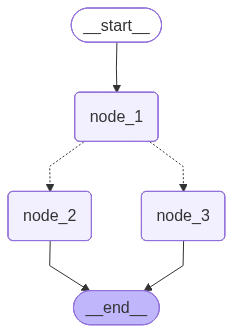

In [13]:
# View
display(Image(graph.get_graph().draw_mermaid_png()))

... and it can invoked as well.

In [20]:
graph.invoke({"graph_state": "Hi, this is lance."})

---Node 1---
---Node 2---


{'graph_state': 'Hi, this is lance. I am happy! :)'}